# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#Starting by modifying column names so that they are clearer
print(df.columns)
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_K',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_SECONDARY',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST',
    'TOTAL_EXPENDITURE':'TOTAL_SPEND',
    'INSTRUCTION_EXPENDITURE':'TEACH_SPEND',
    'SUPPORT_SERVICES_EXPENDITURE':'SUPPORT_SPEND',
    'CAPITAL_OUTLAY_EXPENDITURE':'CAPITAL_SPEND',
    'OTHER_EXPENDITURE':'OTHER_SPEND'
    
}, axis =1, inplace=True)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [4]:
# I have chosen to take a look at Grade 8 Math scores
# Any row that doesn't contain Grade 8 Math scores should be dropped
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

### Cleaning up enrollment numbers

In [5]:
#Here I am checking to see how many enroll_all are nan and if we can fill out the data somewhat
#We see there are 74 nan from ENROLL and 205 nan estimates
print(df["ENROLL_ALL"].isna().sum())
print(df["ENROLL_ALL_EST"].isna().sum())

#I will now attempt to resolve some of these nans

print(df[df["ENROLL_ALL"].isna()][['ENROLL_PREK', 'ENROLL_K','ENROLL_PRIMARY','ENROLL_SECONDARY','ENROLL_ALL_EST']].notna().any()
)#the code above shows we can't use ENROLL_ALL statistics that have nan values as all other
#enrollment numbers will also be nan

#This code shows that around 131 of the estimates that are nan have NCES numbers to fill with
#And that the average error between all estimates and all NCES numbers is relatively low
#at around 2.59% error on average
print(df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum())
print(((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]*100).describe())

#We can proceed with filling the estimates with NCES numbers
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
print(df["ENROLL_ALL"].isna().sum())
print(df["ENROLL_ALL_EST"].isna().sum())

#While we weren't able to clean up any missing ENROLL_ALL numbers, we did manage to clean up the
#ENROLL_ALL_EST numbers somewhat.

74
205
ENROLL_PREK         False
ENROLL_K            False
ENROLL_PRIMARY      False
ENROLL_SECONDARY    False
ENROLL_ALL_EST      False
dtype: bool
131
count    397.000000
mean       2.594598
std        5.130113
min       -9.640412
25%        0.398791
50%        1.352326
75%        3.139245
max       45.069266
dtype: float64
74
74


### Cleaning up financial numbers

In [6]:
#Here I am checking to see how many TOTAL_SPEND values are nan.
#We see there are 163 are nan.
print(df["TOTAL_SPEND"].isna().sum())

#I will now attempt to resolve these nans

print(df[df["TOTAL_SPEND"].isna()][['TEACH_SPEND', 'SUPPORT_SPEND','CAPITAL_SPEND','OTHER_SPEND','TOTAL_REVENUE']].notna().any())
#The code above shows that there are no ways to clean up financial numbers using either sum of
#other spending or using estimates relative to the total expenditure.

df.shape

163
TEACH_SPEND      False
SUPPORT_SPEND    False
CAPITAL_SPEND    False
OTHER_SPEND      False
TOTAL_REVENUE    False
dtype: bool


(602, 25)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [7]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [8]:
states = df.groupby("STATE")
print("Michigan: ", states.get_group("MICHIGAN")["AVG_MATH_8_SCORE"].mean())
print("Ohio: ", states.get_group("OHIO")["AVG_MATH_8_SCORE"].mean())

Michigan:  276.1666666666667
Ohio:  282.25


Find the average for your outcome score across all states in 2019

In [9]:
#states["AVG_MATH_8_SCORE"].mean()
df[(df["YEAR"]==2019)].groupby("STATE")["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 269.0
ALASKA                  274.0
ARIZONA                 280.0
ARKANSAS                274.0
CALIFORNIA              276.0
COLORADO                285.0
CONNECTICUT             286.0
DELAWARE                277.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   292.0
FLORIDA                 279.0
GEORGIA                 279.0
HAWAII                  275.0
IDAHO                   286.0
ILLINOIS                283.0
INDIANA                 286.0
IOWA                    282.0
KANSAS                  282.0
KENTUCKY                278.0
LOUISIANA               272.0
MAINE                   282.0
MARYLAND                280.0
MASSACHUSETTS           294.0
MICHIGAN                280.0
MINNESOTA               291.0
MISSISSIPPI             274.0
MISSOURI                281.0
MONTANA                 284.0
NATIONAL                282.0
NEBRASKA                285.0
NEVADA                  274.0
NEW_HAMPSHIRE           287.0
NEW_JERSEY              292.0
NEW_

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [10]:
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
df.dropna(subset=['TOTAL_SPEND'], inplace=True)
df.dropna(subset=['ENROLL_ALL'], inplace=True)
df["TOTAL_SPEND_PER_STUDENT"] = df["TOTAL_SPEND"] / df["ENROLL_ALL"]
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"] / df["ENROLL_ALL"]

Feature engineering justification: **<I dropped all rows that didn't contain spending or enrollment statistics because I needed data that contained that information to create the TOTAL_SPEND_PER_STUDENT and TOTAL_REVENUE_PER_STUDENT columns in order to try and see how impactful per capita wealth and per student investment each were towards their performance.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

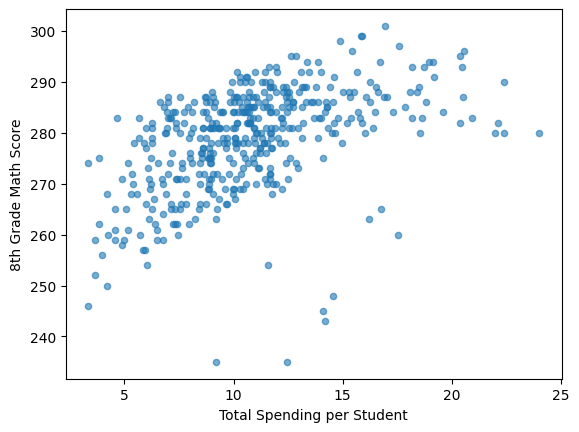

In [12]:
df.plot.scatter(x='TOTAL_SPEND_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Spending per Student')
plt.ylabel('8th Grade Math Score')

**<There is a moderately noticable linear relationship between higher spending for students and and higher scores which flattens after the 15 unit mark. Each additional unit appears to increase scores by 2 points or so\>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

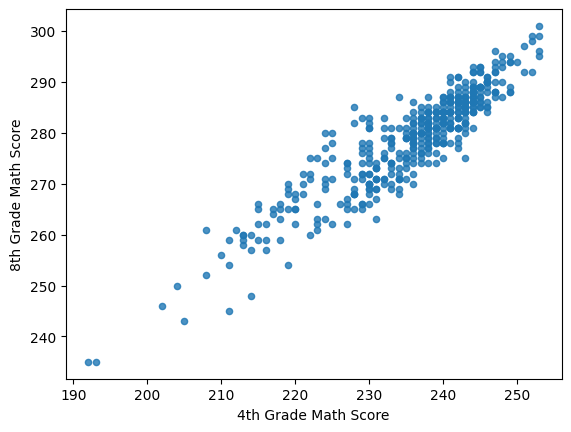

In [13]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

**<There is an extremely strong linear relationship between math scores in grade 4 and math scores in grade 8. This would be a very strong predictor for future grades.\>**

**Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

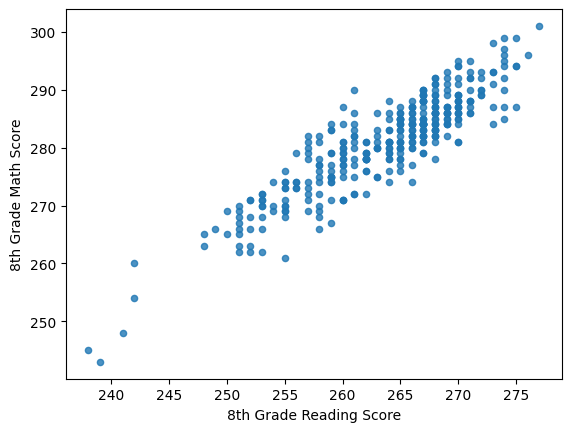

In [14]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**<There is an extremely strong linear relationship between concurrent reading scores and math scores among 8th graders.\>**

**Visualization 4**

Text(0, 0.5, '8th Grade Math Score')

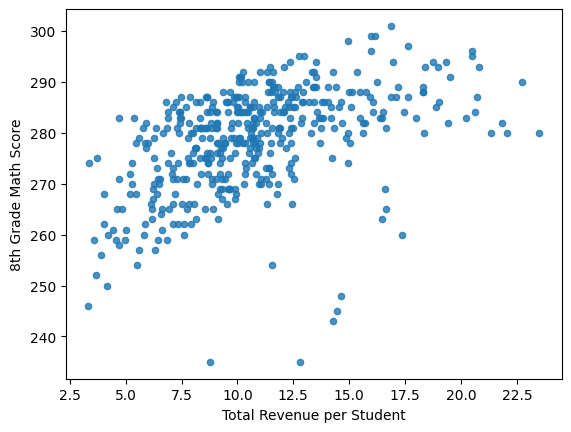

In [15]:
df.plot.scatter(x='TOTAL_REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.8)
plt.xlabel('Total Revenue per Student')
plt.ylabel('8th Grade Math Score')

**<There is a moderate/slight linear relationship between total revenue per capita and math score performance which mirrors the effects of increased investment per student.\>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# X = input data : Total REV/student, READING 8 score, MATH 4 score, Total SPEND/student
# y = response/output data
X = df[['AVG_READING_8_SCORE','AVG_MATH_4_SCORE','TOTAL_REVENUE_PER_STUDENT','TOTAL_SPEND_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [19]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
#Due to all of the relationships being linear in nature it makes the most sense to use linear 
#regression as our machine learning model and have the 4 features get weighted coefficients
#determined by their importance.

In [20]:
# create your model here
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(model.intercept_)
print(model.coef_)

-36.744265235401144
[ 0.53346815  0.73927115 -0.79107141  0.83206462]


In [23]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [24]:
print("Score = ", model.score(X_test, y_test))
print("Mean error = ", np.mean(y_pred-y_test))
print("Mean absolute error", np.mean(np.abs(y_pred-y_test)))
print("Root mean squared error", np.mean((y_pred-y_test)**2)**0.5)

Score =  0.8707244676985783
Mean error =  0.14590001498930072
Mean absolute error 2.340461091509318
Root mean squared error 2.986622168798554


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Feature 1: Model Behavior On Training Set')

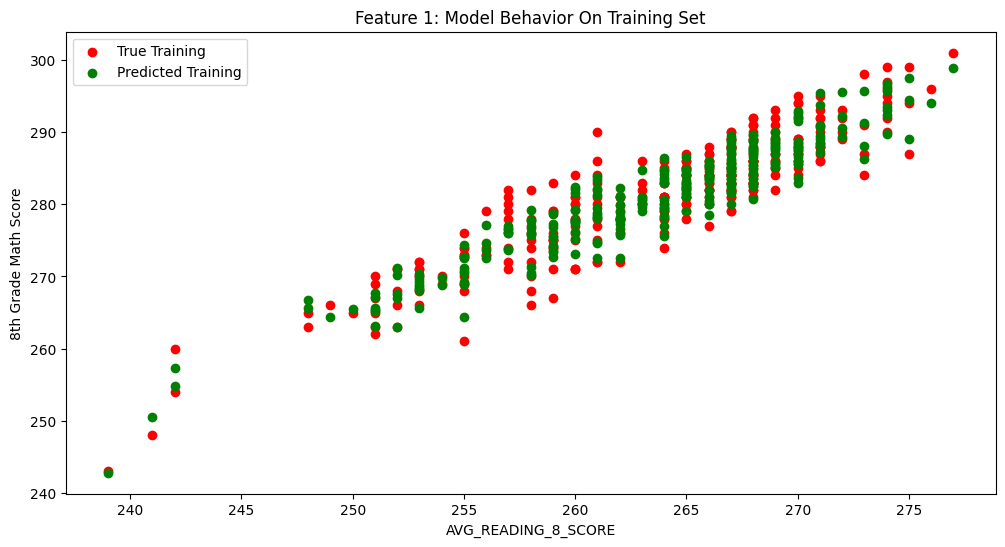

In [25]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 1: Model Behavior On Training Set")

Text(0.5, 1.0, 'Feature 1: Model Behavior on Testing Set')

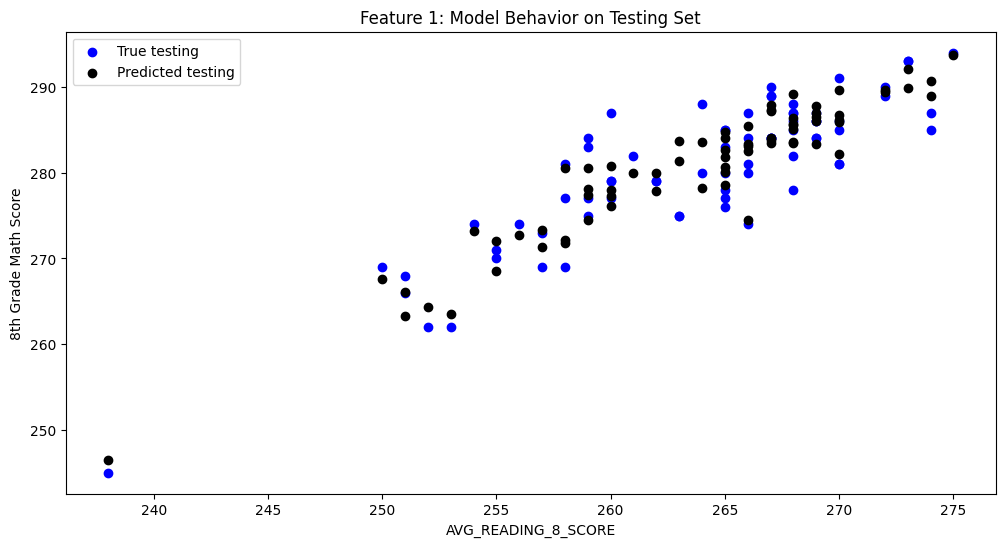

In [26]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 1: Model Behavior on Testing Set")

Text(0.5, 1.0, 'Feature 2: Model Behavior On Training Set')

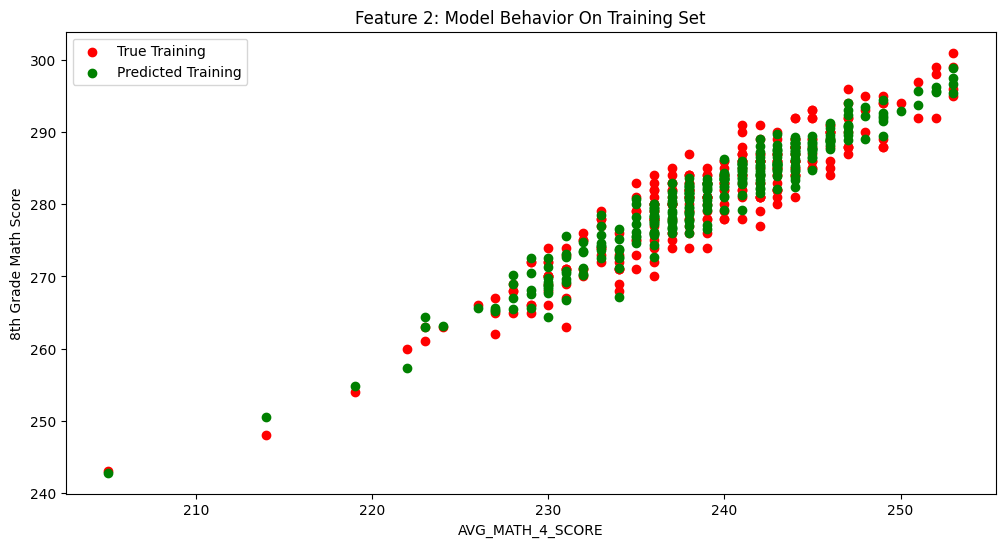

In [27]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 2: Model Behavior On Training Set")

Text(0.5, 1.0, 'Feature 2: Model Behavior on Testing Set')

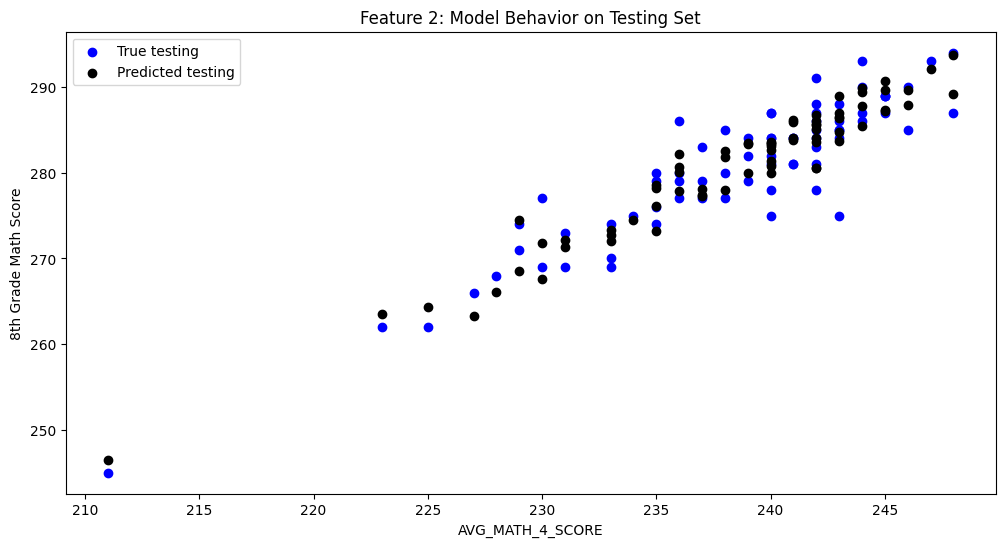

In [28]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 2: Model Behavior on Testing Set")

Text(0.5, 1.0, 'Feature 3: Model Behavior On Training Set')

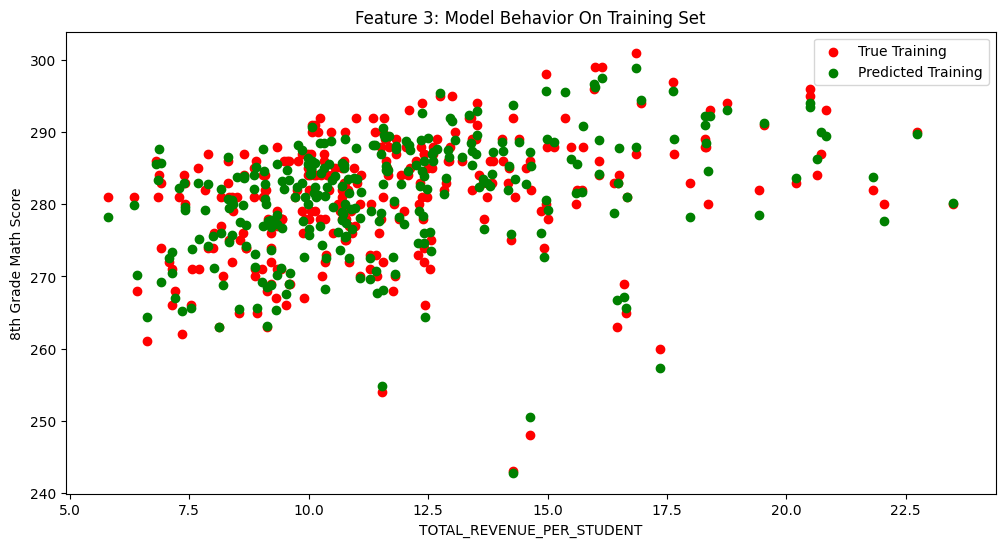

In [29]:
col_name = 'TOTAL_REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 3: Model Behavior On Training Set")

Text(0.5, 1.0, 'Feature 3: Model Behavior on Testing Set')

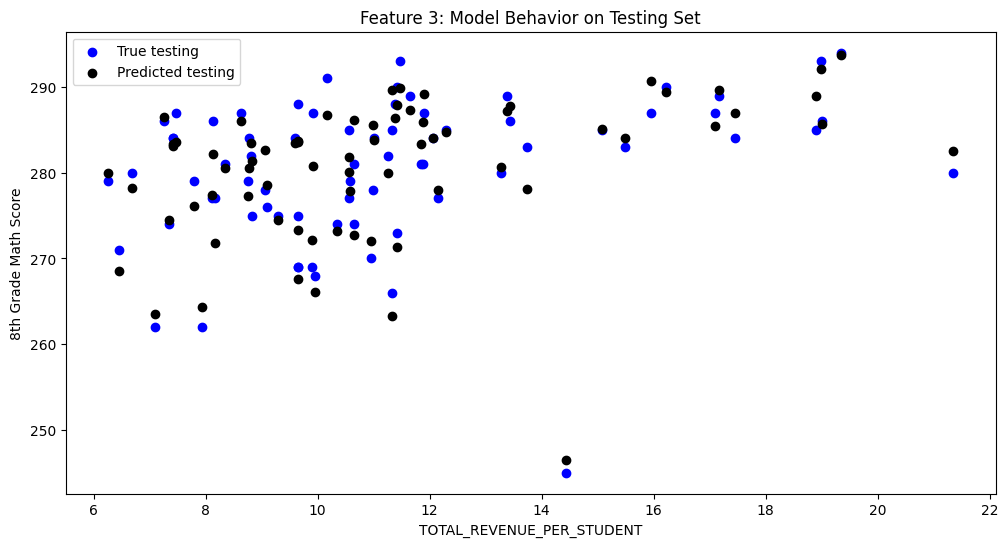

In [30]:
col_name = "TOTAL_REVENUE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 3: Model Behavior on Testing Set")

Text(0.5, 1.0, 'Feature 4: Model Behavior On Training Set')

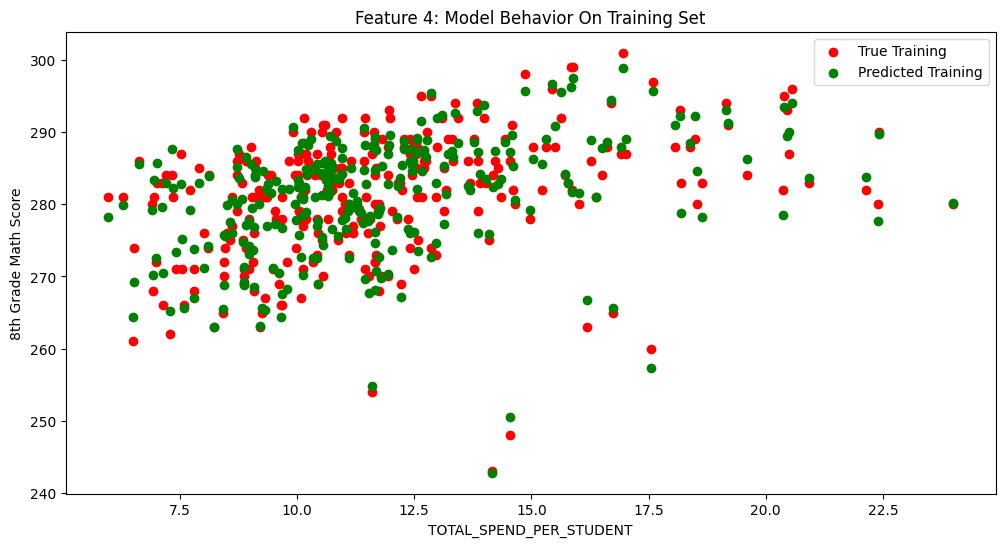

In [31]:
col_name = 'TOTAL_SPEND_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 4: Model Behavior On Training Set")

Text(0.5, 1.0, 'Feature 4: Model Behavior on Testing Set')

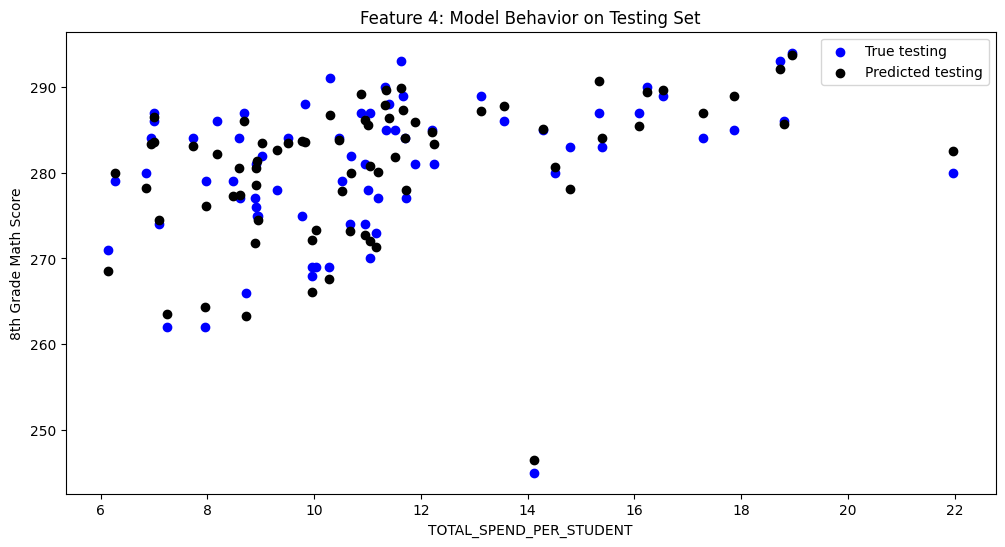

In [32]:
col_name = "TOTAL_SPEND_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Feature 4: Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I decided to analyze the 8th Grade Math Scores. First I tried cleaning enrollment and financial data. Then I did EDA on the score differences across states. I also did some feature engineering by combining financial features and enrollment data to have a way to analyze the impact of finances while taking into account differently sized states. I used graphs to visualize the features which all showed linear relationships to the label, which pointed me in the direction of using a linear regression model. This model was given a training set size of 20%. It got a score of 88% but had some overfitting with financial outliers. However the mean error was high so perhaps on future iterations this overfitting would improve.